In [3]:
import torch

import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [4]:
X = torch.linspace(1,50,50).reshape(-1,1)
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1), dtype=torch.float)
y = 2*X + 1 + e

In [5]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
model = Model(1, 1)

In [6]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [7]:
epochs = 50
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


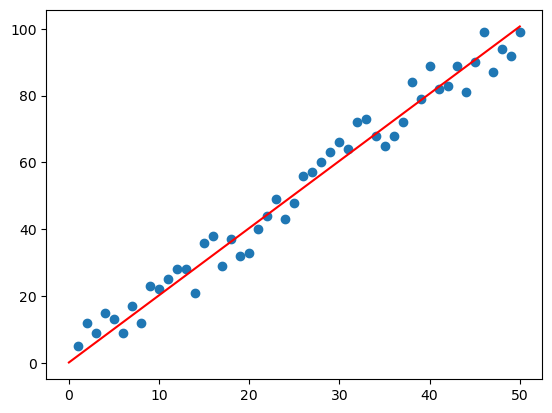

In [10]:
plt.scatter(X.numpy(), y.numpy())
x = np.linspace(0., 50., 50)
predicted_y = model.linear.weight.item() * x + model.linear.bias.item()
plt.plot(x, predicted_y, 'r')